1.	Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets. Vary the activation functions used and compare the results.


Training model with sigmoid activation...


c:\Users\deepd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: sigmoid | Test Accuracy: 0.8550

Training model with relu activation...
Activation: relu | Test Accuracy: 0.8850

Training model with tanh activation...
Activation: tanh | Test Accuracy: 0.9000


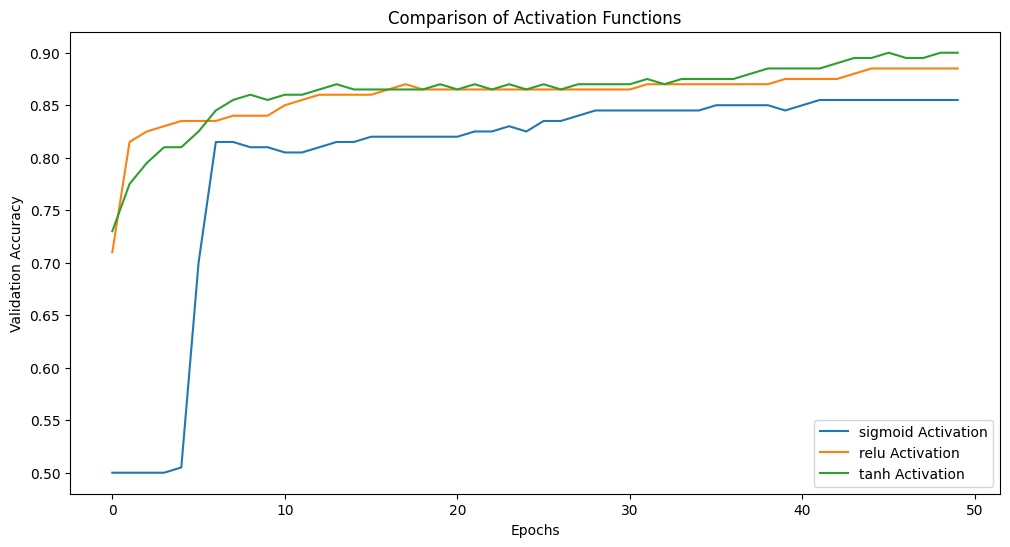

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate a synthetic dataset (make_moons for non-linear classification)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to build and train an ANN with a specified activation function
def train_model(activation_function):
    # Define a sequential ANN model
    model = Sequential([
        Dense(10, activation=activation_function, input_shape=(2,)),  # Hidden layer with 10 neurons
Dense(5, activation=activation_function),  # Another hidden layer
        Dense(1, activation='sigmoid')  # Output layer (Binary Classification)
    ])

    # Compile the model with backpropagation
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Activation: {activation_function} | Test Accuracy: {accuracy:.4f}")

    return history

# Train and compare models with different activation functions
activations = ['sigmoid', 'relu', 'tanh']
histories = {}

plt.figure(figsize=(12, 6))

for activation in activations:
    print(f"\nTraining model with {activation} activation...")
    histories[activation] = train_model(activation)

    # Plot accuracy over epochs
    plt.plot(histories[activation].history['val_accuracy'], label=f"{activation} Activation")

# Graph labels
plt.title('Comparison of Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

